In [1]:
!pip install open3d

In [2]:
import numpy as np
import open3d as o3d
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
with open("/content/drive/MyDrive/points3D.txt", "r") as f:
    temp_pts = f.readlines()[3:]
pts3d = np.array([x.split(" ")[1:4] for x in temp_pts], dtype=np.float32)
rgb3d = np.array([x.split(" ")[4:7] for x in temp_pts], dtype=np.float32)/255

In [5]:
scaled_points = StandardScaler().fit_transform(pts3d)

In [13]:
model = DBSCAN(eps=0.08, min_samples=1)
model.fit(scaled_points)

DBSCAN(eps=0.08, min_samples=1)

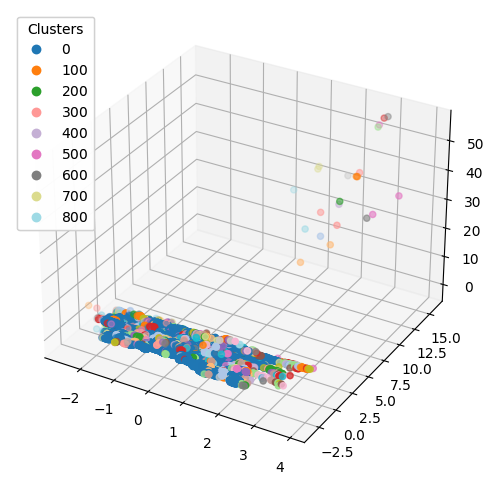

In [14]:
labels = model.fit_predict(scaled_points)

# Visualization using Matplotlib
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
scatter = ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], c=labels, cmap='tab20')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()